## Árboles de desición para especies de flores

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../Data-Sets/datasets/iris/iris.csv")

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

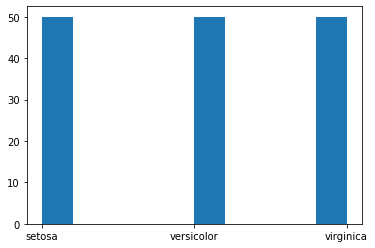

In [8]:
plt.hist(df.Species)

In [9]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
colnames = df.columns.values.tolist()
colnames[4]

'Species'

In [11]:
colnames = df.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [12]:
import numpy as np

In [13]:
df["is_train"] = np.random.uniform(0,1,len(df))<0.75

In [14]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


(array([ 46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 104.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

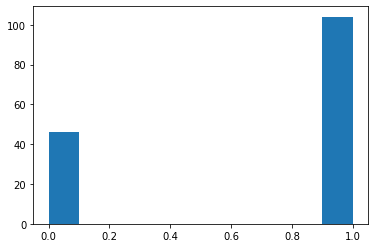

In [15]:
plt.hist(df.is_train.astype(np.float32))

In [16]:
train, test = df[df["is_train"]==True], df[df["is_train"]==False]

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=10, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=99)

In [19]:
preds = tree.predict(test[predictors])

In [43]:
test.shape

(46, 6)

In [20]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,19,0
virginica,0,1,13


## Visualización del árbol de desición

In [21]:
from sklearn.tree import export_graphviz

In [22]:
with open("../../Data-Sets/notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [23]:
import os 
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
from graphviz import Source

In [24]:
file = open("../../Data-Sets/notebooks/resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.581\\nsamples = 104\\nvalue = [37, 31, 36]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 5.05\\nentropy = 0.996\\nsamples = 67\\nvalue = [0, 31, 36]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Width <= 1.65\\nentropy = 0.523\\nsamples = 34\\nvalue = [0, 30, 4]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 28\\nvalue = [0, 28, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.918\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 5 ;\n6 [label="Petal.Width <= 1.7\\nentropy = 0.196\\nsamples = 33\\nvalue = [0, 1, 32]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 29\\nvalue = [0, 0, 29]"] ;\n6 -> 8 ;\n}'

In [44]:
text2='digraph Tree {\nnode [shape=circle] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.581\\nsamples = 104\\nvalue = [37, 31, 36]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 5.05\\nentropy = 0.996\\nsamples = 67\\nvalue = [0, 31, 36]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Width <= 1.65\\nentropy = 0.523\\nsamples = 34\\nvalue = [0, 30, 4]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 28\\nvalue = [0, 28, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.918\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 5 ;\n6 [label="Petal.Width <= 1.7\\nentropy = 0.196\\nsamples = 33\\nvalue = [0, 1, 32]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 29\\nvalue = [0, 0, 29]"] ;\n6 -> 8 ;\n}'

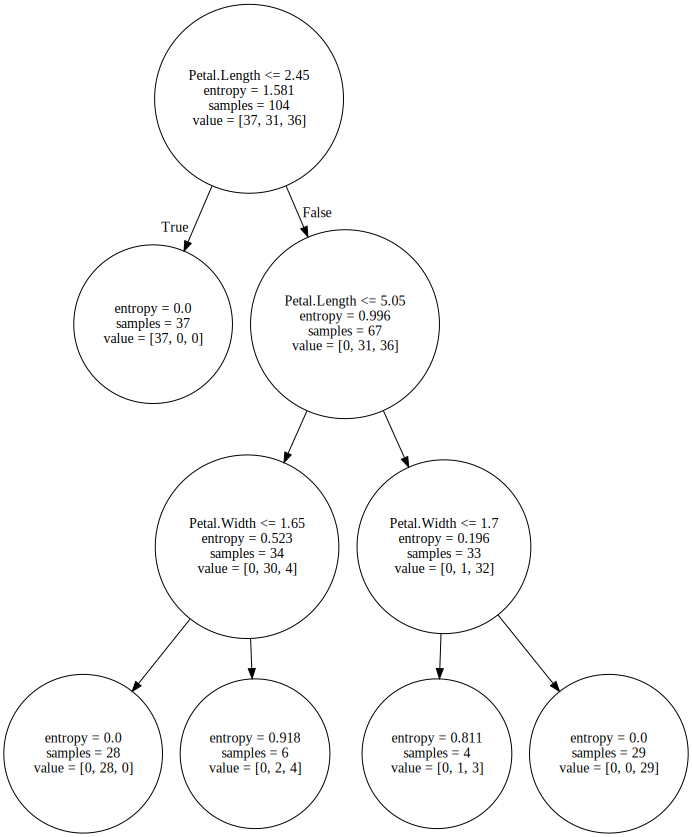

In [45]:
Source(text2)

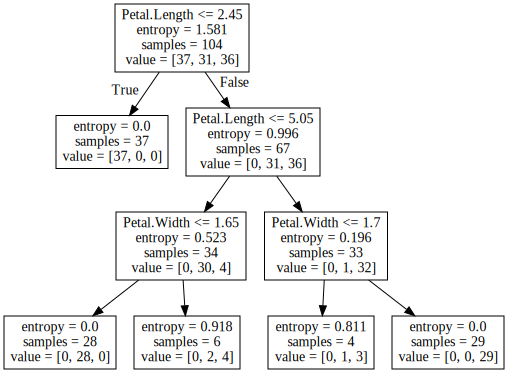

In [25]:
Source(text)

In [46]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Cross Validation para la poda

In [26]:
X = df[predictors]
Y = df[target]

In [27]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [29]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold

In [32]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [33]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [37]:
score = np.mean(scores)

In [38]:
score

0.9333333333333333

Un score de 0.9333 nos dice que el modelo tiene un 93% de presición a la hora de realizar este tipo de clasificación.

In [40]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i= " , i , "es de", score)
    print("   ", tree.feature_importances_)
    

Score para i=  1 es de 0.5666666666666667
    [0. 0. 1. 0.]
Score para i=  2 es de 0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i=  3 es de 0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i=  4 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i=  5 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i=  6 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i=  7 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i=  8 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i=  9 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i=  10 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


El máximo rendimiento se alcanza para i = 3, o sea para una profundidad del árbol de desición igual a 3.

In [41]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

Con tree.feature_importances_ tenemos los 4 predictores y su relevancia en el árbol, si sólo tuviéramos que elegir un solo clasificador, entonces probablemente nos quedaríamos con Petal.Length. En el caso de elegir 2, el 66% de la influencia se la lleva Petal.Length y Petal.Width con un 33% y así suscesivamente. Los **sépalos** no pintan nada al parecer.